# 🛍️ Análise de Vendas Online (2009–2011)

Este projeto tem como objetivo explorar e analisar um conjunto de dados reais de vendas online, abrangendo os anos de 2009 até 2011. A partir das transações registradas, buscamos identificar padrões de comportamento do consumidor, tendências sazonais, produtos de maior destaque e oportunidades de otimização para o negócio.

A análise foi dividida em etapas que simulam o fluxo de trabalho de um analista de dados:

- 🧹 **Limpeza dos dados:** remoção de registros inválidos e preparação do conjunto para análise.
- 📊 **Geração de indicadores-chave (KPIs):** volume de pedidos, receita total, ticket médio, entre outros.
- 📈 **Análises temporais e sazonais:** evolução de compras e faturamento ao longo dos meses.
- 🎁 **Avaliação de produtos:** itens mais vendidos e com maior impacto financeiro.
- 🌍 **Desempenho por país:** análise geográfica das vendas.
- 💡 **Conclusões e recomendações:** insights práticos para apoiar decisões estratégicas.

Este notebook foi desenvolvido com o intuito de demonstrar habilidades em manipulação de dados com `pandas`, visualização com `matplotlib` e `plotly`, além da capacidade de gerar valor através da análise exploratória e storytelling com dados.

---


## 📄 Sobre a Base de Dados

A base utilizada nesta análise é o conjunto de dados **[Online Retail Dataset](https://www.kaggle.com/datasets/lakshmi25npathi/online-retail-dataset)**, disponibilizado no Kaggle. 

Ela contém transações ocorridas entre dezembro de 2009 e dezembro de 2011, registradas por uma empresa de comércio eletrônico com sede no Reino Unido. Os dados incluem informações como:

- Código da fatura (InvoiceNo),
- Código e descrição do produto,
- Quantidade vendida,
- Data da transação,
- Valor unitário do produto,
- Código e nome do cliente,
- País de origem.

Essa base é amplamente utilizada para fins educacionais e explorações de dados, e **permite análises reais de comportamento de consumo, sazonalidade, desempenho de produtos e insights geográficos**.

Vale destacar que, por ser uma base pública, algumas inconsistências e dados faltantes podem estar presentes e foram tratados ao longo do projeto.


## 1. Carregamento dos Dados

In [2]:
# Importação das biliotecas que serão utilizadas na análise
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [3]:
# Caminho do arquivo em Excel
df_path = 'sales_marketplace\online_retail_II.xlsx'

<>:2: SyntaxWarning: invalid escape sequence '\o'
<>:2: SyntaxWarning: invalid escape sequence '\o'
C:\Users\Pablo Pereira\AppData\Local\Temp\ipykernel_23012\3653926324.py:2: SyntaxWarning: invalid escape sequence '\o'
  df_path = 'sales_marketplace\online_retail_II.xlsx'


In [4]:
# Realizando a leitura do arquivo e concatenando ambos os DataFrames pois estão em abas diferentes
df_1 = pd.read_excel(df_path, sheet_name='Year 2009-2010')
df_2 = pd.read_excel(df_path, sheet_name='Year 2010-2011')

df_unificado = pd.concat([df_1, df_2])

df_unificado.shape

(1067371, 8)

## 2. Limpeza e Tratamento dos Dados

In [5]:
# 1. Remover invoices com prefixos 'A' ou 'C'
df_cancelamento_ajuste = df_unificado[
    df_unificado['Invoice'].str.startswith('C', na=False) |
    df_unificado['Invoice'].str.startswith('A', na=False)
].copy()

# 2. Remover quantidades negativas
df_quantity_zero = df_unificado[df_unificado['Quantity'] < 0]

# 3. Remover descrições nulas
df_description_null = df_unificado[df_unificado['Description'].isnull()]

# 4. Remover preços igual a zero
df_price_zero = df_unificado[df_unificado['Price'] == 0]

# 5. Filtrar StockCodes válidos (5 números + 1 letra)
df_stock_code_invalido = df_unificado[~df_unificado['StockCode'].astype(str).str.match(r'^\d{5}[a-zA-Z]?$')]

# 6. Criando indices para realizar a demoção dos index
indices_remover = (
    df_cancelamento_ajuste.index
    .union(df_quantity_zero.index)
    .union(df_description_null.index)
    .union(df_price_zero.index)
    .union(df_stock_code_invalido.index)
)

# 7. Realizando a remoção dos index
df_tratamento = df_unificado.drop(indices_remover).reset_index(drop=True)

# 8. Criar coluna de receita
df_tratamento['TotalPrice'] = df_tratamento['Quantity'] * df_tratamento['Price']

# 9. Converter coluna de data
df_tratamento['InvoiceDate'] = pd.to_datetime(df_tratamento['InvoiceDate'])

# 10. Criar colunas auxiliares de tempo
df_tratamento['Ano'] = df_tratamento['InvoiceDate'].dt.year
df_tratamento['Mes'] = df_tratamento['InvoiceDate'].dt.month
df_tratamento['AnoMes'] = df_tratamento['InvoiceDate'].dt.to_period('M').astype(str)

# 11. Mapeamento de nomes não reconhecidos
country_mapping = {
    'EIRE': 'Ireland',
    'Channel Islands': 'Guernsey',
    'RSA': 'South Africa',
    'West Indies': 'Caribbean',
    'European Community': 'European Union',
    'USA': 'United States',
    'Korea': 'South Korea',
    'UAE': 'United Arab Emirates'
}

# Substituir no DataFrame principal de tratamento
df_tratamento['Country'] = df_tratamento['Country'].replace(country_mapping)

# 12. Criando o DF oficial para realização das analises
df_sales = df_tratamento

## 3. Visão Geral de Indicadores

In [6]:
# Resumo Consolidado dos Principais Indicadores de Desempenho da Empresa
print("🧾 Total de pedidos únicos:", df_sales['Invoice'].nunique())
print("👥 Total de clientes únicos:", df_sales['Customer ID'].nunique())
print("🛍️ Total de produtos distintos vendidos:", df_sales['Description'].nunique())
print("📦 Quantidade total de produtos vendidos:", df_sales['Quantity'].sum())
print("💷 Receita total: £", round(df_sales['TotalPrice'].sum(), 2))
print("🎯 Ticket médio: £", round(df_sales.groupby('Invoice')['TotalPrice'].sum().mean(), 2))

🧾 Total de pedidos únicos: 39265
👥 Total de clientes únicos: 5844
🛍️ Total de produtos distintos vendidos: 5353
📦 Quantidade total de produtos vendidos: 11058346
💷 Receita total: £ 19471924.21
🎯 Ticket médio: £ 495.91


## 4. Análise Temporal e Variação de Resultados

In [7]:
# Realizando um agrupamento de Receita separado por Mes e Ano
receita_mes = df_sales.groupby('AnoMes')['TotalPrice'].sum().reset_index()

# Visualização dos dados
print(receita_mes)

     AnoMes  TotalPrice
0   2009-12   762968.74
1   2010-01   587437.71
2   2010-02   524871.46
3   2010-03   736276.03
4   2010-04   627165.74
5   2010-05   628854.28
6   2010-06   679656.17
7   2010-07   614895.82
8   2010-08   659628.88
9   2010-09   849856.19
10  2010-10  1063334.48
11  2010-11  1397495.90
12  2010-12  1144627.90
13  2011-01   645967.44
14  2011-02   485660.17
15  2011-03   662903.42
16  2011-04   501358.04
17  2011-05   706441.06
18  2011-06   715001.49
19  2011-07   660500.26
20  2011-08   703173.95
21  2011-09  1000658.78
22  2011-10  1073832.04
23  2011-11  1429504.92
24  2011-12   609853.34


In [8]:
# Realizando um agrupamento de quantidade vendida separada por Mes e Ano
quantidade_mes = df_sales.groupby('AnoMes')['Quantity'].sum().reset_index()

# Visualizar os dados
print(quantidade_mes)

     AnoMes  Quantity
0   2009-12    410489
1   2010-01    366386
2   2010-02    373129
3   2010-03    512557
4   2010-04    355788
5   2010-05    386304
6   2010-06    397716
7   2010-07    329212
8   2010-08    465032
9   2010-09    571685
10  2010-10    602159
11  2010-11    711170
12  2010-12    522302
13  2011-01    371948
14  2011-02    269994
15  2011-03    362896
16  2011-04    299234
17  2011-05    376413
18  2011-06    374161
19  2011-07    386558
20  2011-08    409023
21  2011-09    554278
22  2011-10    604432
23  2011-11    734811
24  2011-12    310669


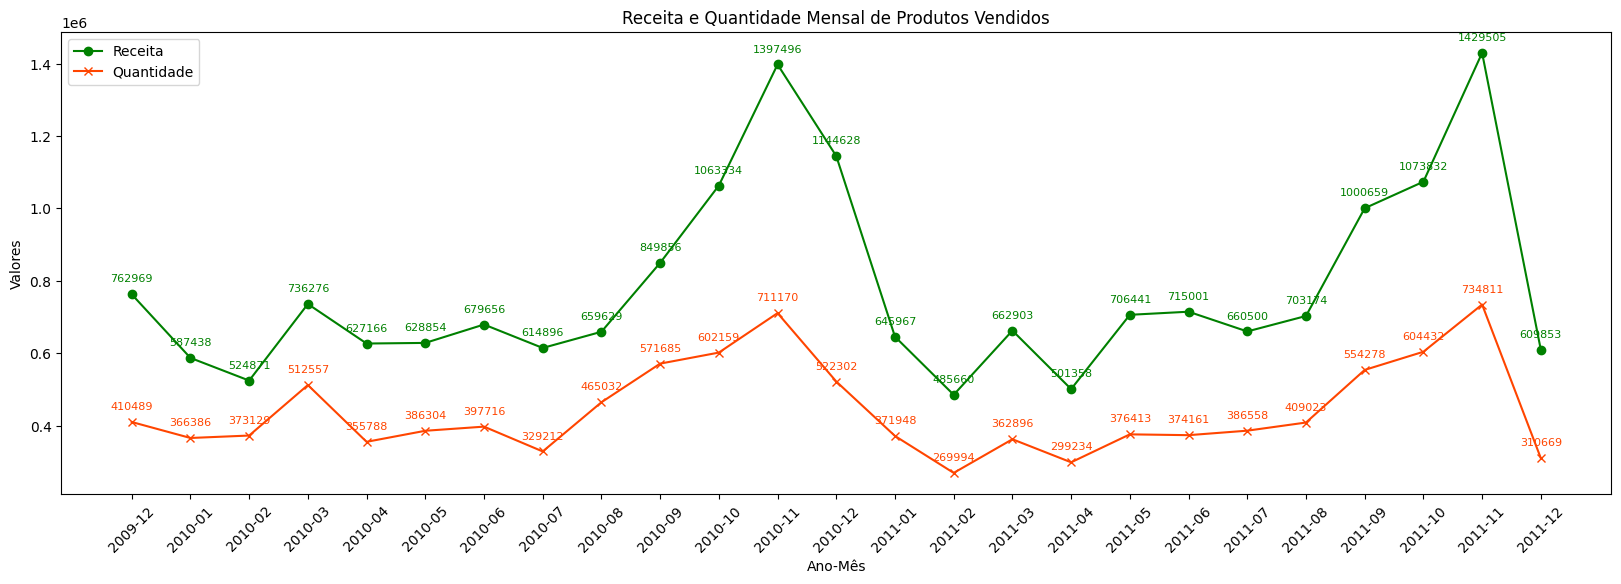

In [9]:
# Realizando a criação do gráfico com suas configurações necessárias
plt.figure(figsize=(20,6))
plt.plot(receita_mes['AnoMes'], receita_mes['TotalPrice'], marker='o', label='Receita', color='green')  # verde
plt.plot(quantidade_mes['AnoMes'], quantidade_mes['Quantity'], marker='x', label='Quantidade', color='orangered')  # laranja forte
plt.xticks(rotation=45)
plt.title('Receita e Quantidade Mensal de Produtos Vendidos')
plt.xlabel('Ano-Mês')
plt.ylabel('Valores')
plt.legend()

# Remove o fundo quadriculado (grid)
plt.grid(False)

# Ajustar deslocamento vertical dos rótulos
offset = max(receita_mes['TotalPrice'].max(), quantidade_mes['Quantity'].max()) * 0.02

# Realiza a inclusão dos rótulos de dados na linha do gráfico
for i, v in enumerate(receita_mes['TotalPrice']):
    plt.text(i, v + offset, f'{v:.0f}', ha='center', va='bottom', fontsize=8, color='green')

for i, v in enumerate(quantidade_mes['Quantity']):
    plt.text(i, v + offset, f'{v:.0f}', ha='center', va='bottom', fontsize=8, color='orangered')

plt.show()

In [10]:
# Realizando um agrupamento de receita gerada por semestre dos anos analisados
rps_2010_1 = df_sales.loc[(df_sales['Ano'] == 2010) & (df_sales['Mes'] <= 6), 'TotalPrice'].sum()
rps_2010_2 = df_sales.loc[(df_sales['Ano'] == 2010) & (df_sales['Mes'] > 6), 'TotalPrice'].sum()
rps_2011_1 = df_sales.loc[(df_sales['Ano'] == 2011) & (df_sales['Mes'] <= 6), 'TotalPrice'].sum()
rps_2011_2 = df_sales.loc[(df_sales['Ano'] == 2011) & (df_sales['Mes'] > 6), 'TotalPrice'].sum()

# Realizando um agrupamento de receita gerada por ano
total_2010 = rps_2010_1 + rps_2010_2
total_2011 = rps_2011_1 + rps_2011_2

# Função para evitar divisão por 0
def var_perc(novo, antigo):
    if antigo == 0:
        return 0
    return round((novo / antigo - 1) * 100, 2)

# Cálculo das variações
var_2010 = var_perc(rps_2010_2, rps_2010_1)
var_2011 = var_perc(rps_2011_2, rps_2011_1)
var_1_sem = var_perc(rps_2011_1, rps_2010_1)
var_2_sem = var_perc(rps_2011_2, rps_2010_2)
var_ano = var_perc(total_2011, total_2010)

In [11]:
# Print com os resultados anuais e semestrais com suas variações de resultados
print("Análise da Receita por Semestre e Ano (2010 e 2011):\n")

print(f"Receita 1º semestre 2010: £ {rps_2010_1:,.2f}")
print(f"Receita 2º semestre 2010: £ {rps_2010_2:,.2f}")
print(f"Variação 2º semestre vs 1º semestre 2010: {var_2010:.2f}%")
if var_2010 > 0:
    print("  > Crescimento no 2º semestre de 2010 em relação ao 1º semestre.")
else:
    print("  > Queda no 2º semestre de 2010 em relação ao 1º semestre.")

print("\n")

print(f"Receita 1º semestre 2011: £ {rps_2011_1:,.2f}")
print(f"Receita 2º semestre 2011: £ {rps_2011_2:,.2f}")
print(f"Variação 2º semestre vs 1º semestre 2011: {var_2011:.2f}%")
if var_2011 > 0:
    print("  > Crescimento no 2º semestre de 2011 em relação ao 1º semestre.")
else:
    print("  > Queda no 2º semestre de 2011 em relação ao 1º semestre.")

print("\n")

print(f"Variação 1º semestre 2011 vs 2010: {var_1_sem:.2f}%")
if var_1_sem > 0:
    print("  > Crescimento no 1º semestre de 2011 em relação a 2010.")
else:
    print("  > Queda no 1º semestre de 2011 em relação a 2010.")

print(f"Variação 2º semestre 2011 vs 2010: {var_2_sem:.2f}%")
if var_2_sem > 0:
    print("  > Crescimento no 2º semestre de 2011 em relação a 2010.")
else:
    print("  > Queda no 2º semestre de 2011 em relação a 2010.")

print("\n")

print(f"Total anual 2010: £ {total_2010:,.2f}")
print(f"Total anual 2011: £ {total_2011:,.2f}")
print(f"Variação anual (YoY) 2011 vs 2010: {var_ano:.2f}%")
if var_ano > 0:
    print("  > Crescimento da receita total em 2011 em relação a 2010.")
else:
    print("  > Queda da receita total em 2011 em relação a 2010.")


Análise da Receita por Semestre e Ano (2010 e 2011):

Receita 1º semestre 2010: £ 3,784,261.39
Receita 2º semestre 2010: £ 5,729,839.17
Variação 2º semestre vs 1º semestre 2010: 51.41%
  > Crescimento no 2º semestre de 2010 em relação ao 1º semestre.


Receita 1º semestre 2011: £ 3,717,331.62
Receita 2º semestre 2011: £ 5,477,523.29
Variação 2º semestre vs 1º semestre 2011: 47.35%
  > Crescimento no 2º semestre de 2011 em relação ao 1º semestre.


Variação 1º semestre 2011 vs 2010: -1.77%
  > Queda no 1º semestre de 2011 em relação a 2010.
Variação 2º semestre 2011 vs 2010: -4.40%
  > Queda no 2º semestre de 2011 em relação a 2010.


Total anual 2010: £ 9,514,100.56
Total anual 2011: £ 9,194,854.91
Variação anual (YoY) 2011 vs 2010: -3.36%
  > Queda da receita total em 2011 em relação a 2010.


### 4.1 📌 Conclusão Final da Análise Temporal e Variação de Resultados

A análise temporal das vendas ao longo dos anos de **2009 a 2011** permitiu identificar padrões claros de sazonalidade, bem como variações significativas de desempenho entre os semestres e entre os anos completos.

Os meses de **novembro de 2010 e 2011** se destacaram como os maiores em volume de vendas e geração de receita, reforçando uma **forte tendência sazonal**. Observou-se que a performance da empresa começa a se intensificar a partir de **setembro**, alcançando seu pico em novembro. Esse comportamento indica que o **segundo semestre** é consistentemente o período mais lucrativo do ano.

Comparando os semestres:

- Em **2010**, o segundo semestre superou o primeiro com um crescimento de **+51,41%** na receita.
- Em **2011**, esse crescimento foi de **+47,35%** em relação ao primeiro semestre do mesmo ano.

Apesar disso, o desempenho de 2011 não superou o de 2010. Comparando os mesmos períodos entre os dois anos:

- O **1º semestre de 2011** teve uma leve **queda de -1,77%** em relação ao de 2010.
- O **2º semestre de 2011** registrou um decréscimo de **-4,40%** comparado ao segundo semestre de 2010.

Como consequência, o resultado anual de 2011 foi **inferior ao de 2010**, com uma **queda total de -3,36%** na receita anual, mesmo com o excelente desempenho de novembro. O fator mais crítico foi o mês de **dezembro de 2011**, que teve uma queda brusca tanto em receita quanto em quantidade de produtos vendidos, o que comprometeu o fechamento do ano. Essa baixa pode estar associada a fatores operacionais, como um possível **fechamento de operação** ou redução de atividades no período.

Por fim, uma observação relevante é que o único mês registrado de **2009**, dezembro, apresentou um desempenho **superior ao mesmo mês de 2011**, mesmo sem dados adicionais para comparação semestral. Isso reforça o impacto negativo que dezembro de 2011 teve sobre os resultados globais da empresa.

Em resumo, a análise temporal evidenciou a **dependência da sazonalidade** para os bons resultados da empresa e ressaltou a importância de uma gestão cuidadosa no final do ano, especialmente em dezembro, mês decisivo para o fechamento positivo do exercício.

## 5. Análise de Produtos

In [12]:
# Agrupamento completo da quantidade vendida por produto
quantidade_por_produto = (
    df_sales.groupby('Description')['Quantity']
    .sum()
    .reset_index()
    .sort_values(by='Quantity', ascending=False)
)

# Agora, crie uma variável só com o TOP 5
top5_quantidade = quantidade_por_produto.head(5)

# Print dos produtos com destaque
print("O TOP 5 Produtos mais vendidos em quantidade são:")
for _, row in top5_quantidade.iterrows():
    print(f"{row['Description']} — {row['Quantity']}")

O TOP 5 Produtos mais vendidos em quantidade são:
WORLD WAR 2 GLIDERS ASSTD DESIGNS — 106378
WHITE HANGING HEART T-LIGHT HOLDER — 94485
PAPER CRAFT , LITTLE BIRDIE — 80995
ASSORTED COLOUR BIRD ORNAMENT — 79131
MEDIUM CERAMIC TOP STORAGE JAR — 77968


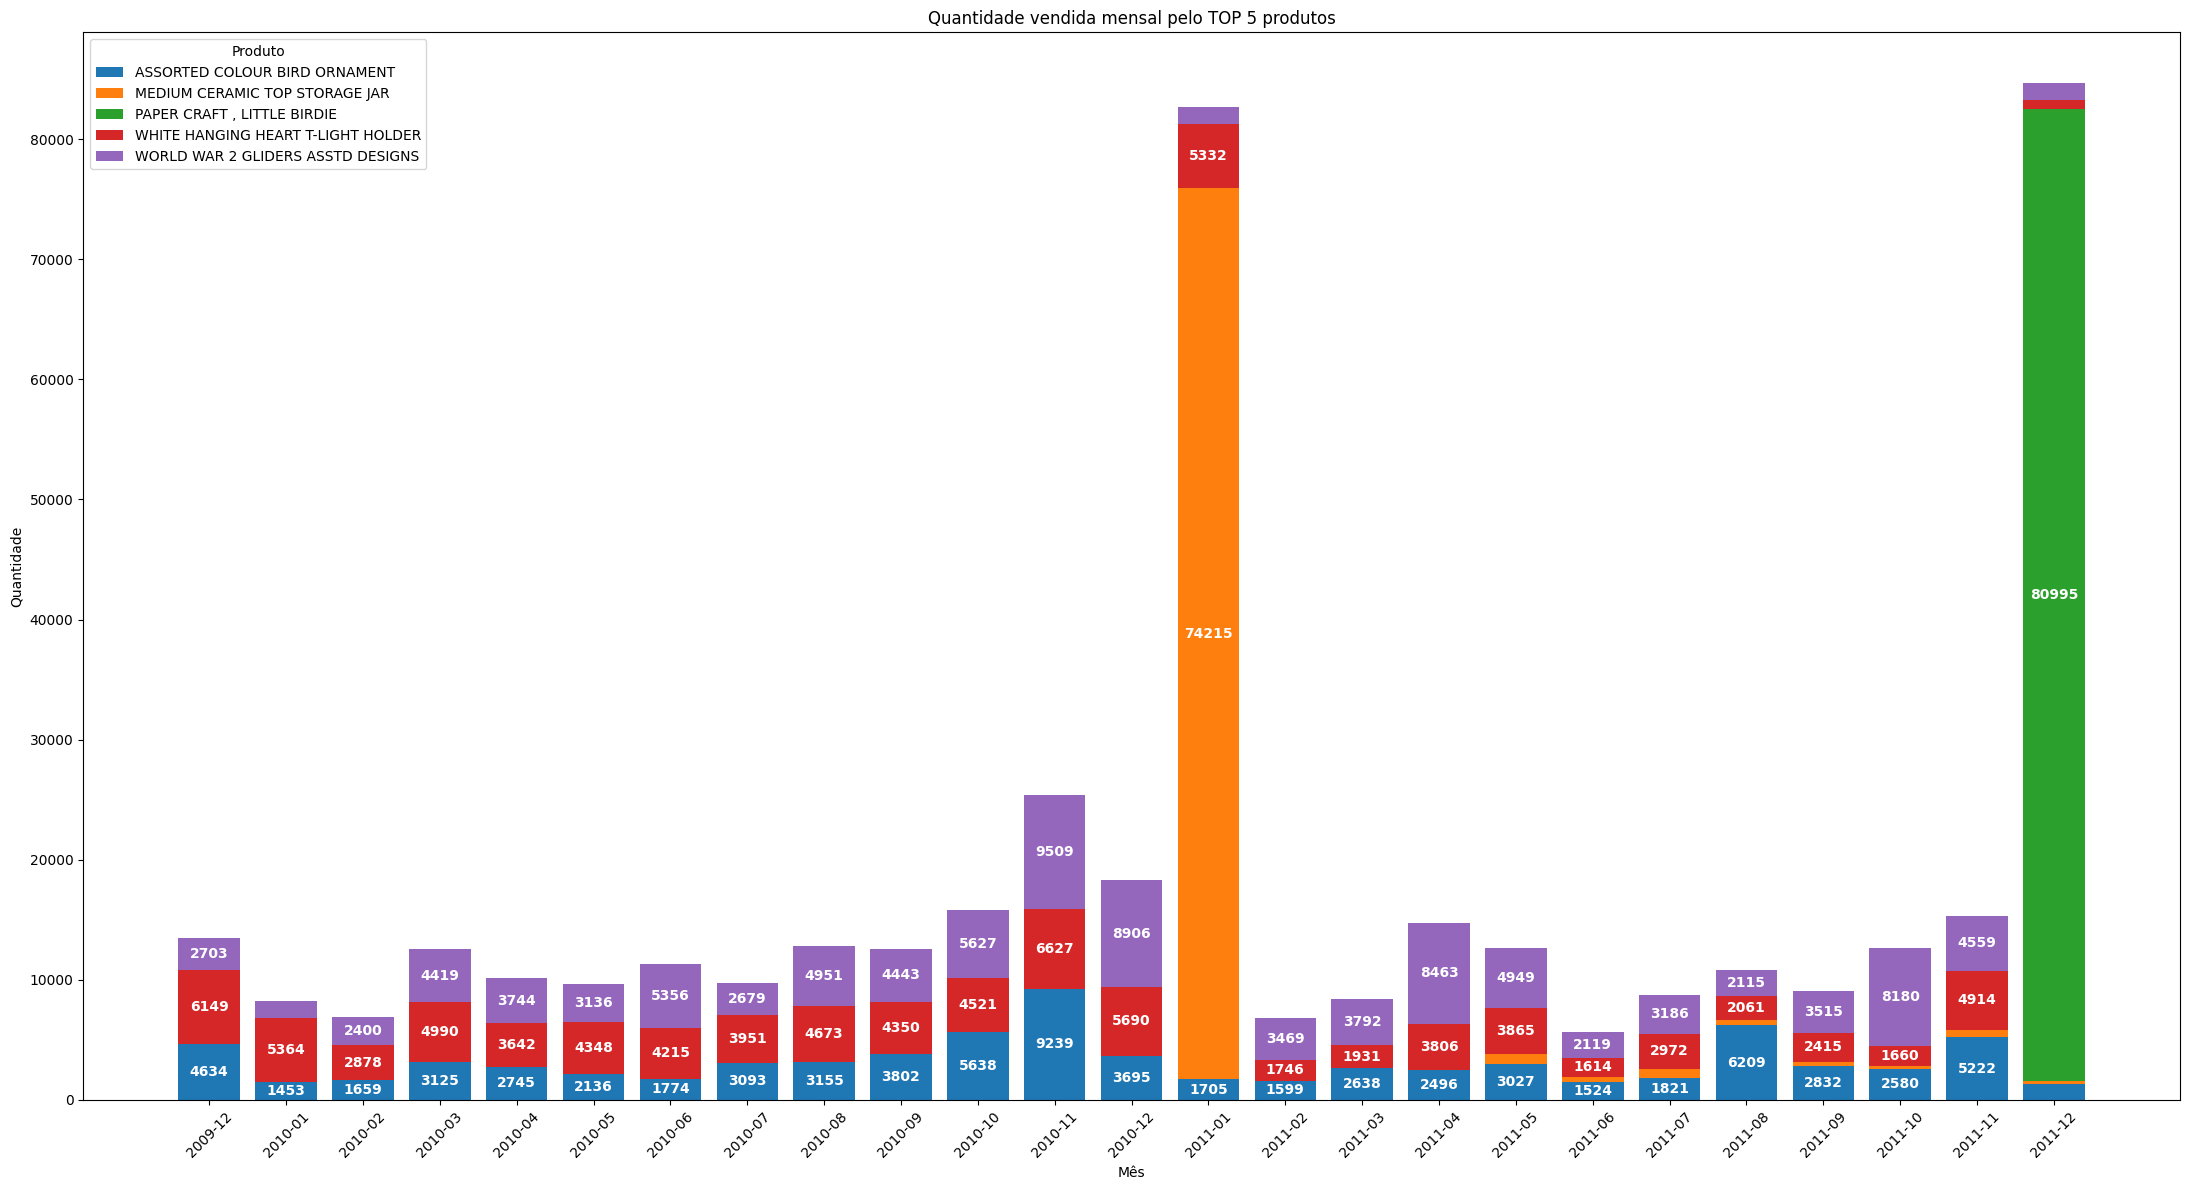

In [26]:
# Filtra o DataFrame para os produtos do top 5 por quantidade
df_top5 = df_sales[df_sales['Description'].isin(top5_quantidade['Description'])]

# Agrupa a quantidade vendida por mês e produto
quantidade_mensal = df_top5.groupby(['AnoMes', 'Description'])['Quantity'].sum().reset_index()

# Transforma para formato de tabela com meses nas linhas e produtos nas colunas
df_pivot = quantidade_mensal.pivot(index='AnoMes', columns='Description', values='Quantity').fillna(0)

plt.figure(figsize=(22, 12))

produtos = df_pivot.columns
x = np.arange(len(df_pivot.index))

bottom = np.zeros(len(df_pivot))

for produto in produtos:
    alturas = df_pivot[produto].values
    barras = plt.bar(x, alturas, bottom=bottom, label=produto)
    
    # Adiciona rótulos apenas para barras com valor maior que 1400
    for bar, altura, base in zip(barras, alturas, bottom):
        if altura > 1400:
            plt.text(
                bar.get_x() + bar.get_width() / 2,
                base + altura / 2,
                str(int(altura)),
                ha='center',
                va='center',
                color='white',
                fontsize=10,
                fontweight='bold'
            )
    bottom += alturas

plt.title('Quantidade vendida mensal pelo TOP 5 produtos')
plt.xlabel('Mês')
plt.ylabel('Quantidade')
plt.xticks(x, df_pivot.index, rotation=45)
plt.legend(title='Produto')
plt.tight_layout()
plt.show()

In [14]:
# Agrupamento completo da receita gerada por produto
receita_por_produto = (
    df_sales.groupby('Description')['TotalPrice']
    .sum()
    .reset_index()
    .sort_values(by='TotalPrice', ascending=False)
)

# Agora, variável só com o TOP 5
top5_receita = receita_por_produto.head(5)

# Print dos produtos com destaque
print("O TOP 5 Produtos com maior receita são:")
for _, row in top5_receita.iterrows():
    print(f"{row['Description']} — £{row['TotalPrice']:.2f}")

O TOP 5 Produtos com maior receita são:
REGENCY CAKESTAND 3 TIER — £335303.31
WHITE HANGING HEART T-LIGHT HOLDER — £260869.17
PAPER CRAFT , LITTLE BIRDIE — £168469.60
JUMBO BAG RED RETROSPOT — £145151.98
PARTY BUNTING — £145078.33


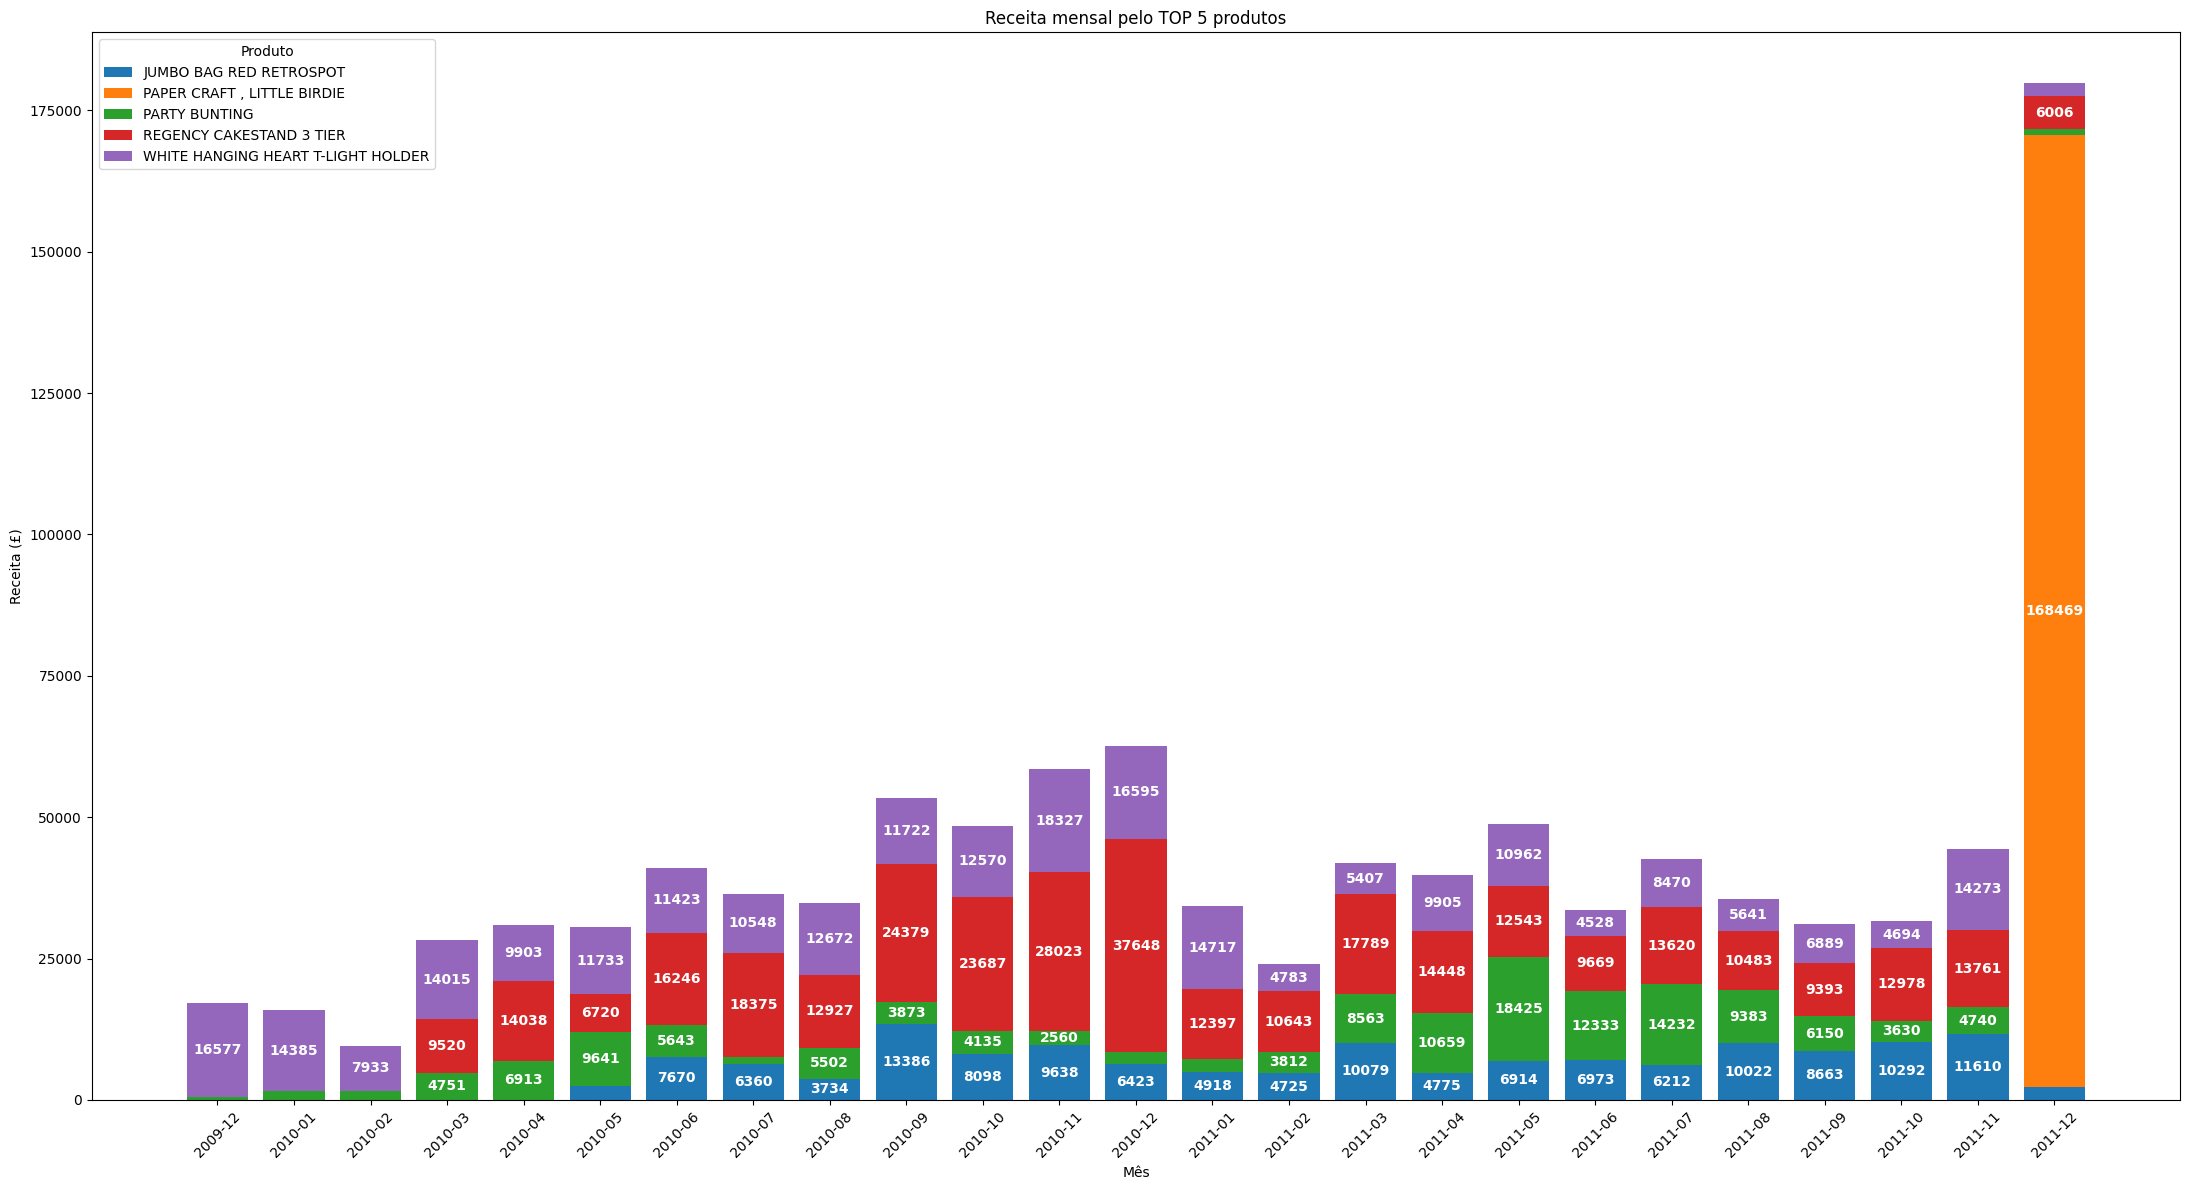

In [27]:
# Filtra só os top 5 produtos por receita
df_top5_receita = df_sales[df_sales['Description'].isin(top5_receita['Description'])]

# Agrupa receita mensal por produto
receita_mensal = df_top5_receita.groupby(['AnoMes', 'Description'])['TotalPrice'].sum().reset_index()

# Transforma para formato de tabela para o gráfico
df_pivot_receita = receita_mensal.pivot(index='AnoMes', columns='Description', values='TotalPrice').fillna(0)

plt.figure(figsize=(15, 15))

produtos = df_pivot_receita.columns
x = np.arange(len(df_pivot_receita.index))

bottom = np.zeros(len(df_pivot_receita))

for produto in produtos:
    alturas = df_pivot_receita[produto].values
    bars = plt.bar(x, alturas, bottom=bottom, label=produto)
    
    # Rótulo só para valores grandes pra não poluir o gráfico
    for bar, altura, base in zip(bars, alturas, bottom):
        if altura > 2500:
            plt.text(
                bar.get_x() + bar.get_width() / 2,
                base + altura / 2,
                str(int(altura)),
                ha='center',
                va='center',
                color='white',
                fontsize=10,
                fontweight='bold'
            )
    bottom += alturas

plt.title('Receita mensal pelo TOP 5 produtos')
plt.xlabel('Mês')
plt.ylabel('Receita (£)')
plt.xticks(x, df_pivot_receita.index, rotation=45)
plt.legend(title='Produto')
plt.tight_layout()
plt.show()

### 5.1 📌 Conclusão Final da Análise de Produtos

Esta análise compara a **quantidade vendida** e a **receita gerada** mensalmente por alguns dos principais produtos da base de dados entre 2009 e 2011.

### 🧮 Quantidade Vendida: Produtos em Destaque

- **WHITE HANGING HEART T-LIGHT HOLDER** foi o produto mais vendido de forma consistente ao longo do período, com altos volumes mensais.
- **WORLD WAR 2 GLIDERS ASSTD DESIGNS** teve picos de vendas especialmente em **novembro e dezembro**, indicando forte apelo sazonal.
- **ASSORTED COLOUR BIRD ORNAMENT** também apresentou aumento de vendas nos trimestres finais dos anos, reforçando o padrão de sazonalidade.

### 💰 Receita Gerada: Produtos Mais Rentáveis

- **REGENCY CAKESTAND 3 TIER** teve alto desempenho em receita mesmo com menor volume de vendas, alcançando valores acima de **R$ 37 mil** em meses-chave — indicando alto ticket médio.
- **WHITE HANGING HEART T-LIGHT HOLDER** combinou alto volume e boa receita, sendo um produto com bom giro e retorno financeiro.
- **PAPER CRAFT, LITTLE BIRDIE** teve um pico isolado em **dezembro de 2011**, com quase **R$ 170 mil** em receita e alto volume vendido. Como não há registros anteriores, isso pode indicar um **produto novo**, com forte lançamento ou popularidade repentina.

### 🔁 Nem sempre Quantidade = Receita

- Produtos com muitas unidades vendidas nem sempre geram a maior receita.
- Exemplo: *WORLD WAR 2 GLIDERS ASSTD DESIGNS* vende bastante, mas tem baixo valor unitário.
- Já *REGENCY CAKESTAND 3 TIER*, com vendas moderadas, gera receita expressiva — reforçando a importância de analisar o **ticket médio**.

### 🔎 Casos Específicos

- **MEDIUM CERAMIC TOP STORAGE JAR** teve destaque **apenas em janeiro de 2011**, com mais de **74 mil unidades vendidas**. Nos meses seguintes, praticamente não aparece — sugerindo um pico pontual, provavelmente relacionado a queima de estoque, campanha específica ou erro de entrada.
- **PAPER CRAFT, LITTLE BIRDIE**, como citado, só aparece em **dez/2011**, mas com impacto direto em **quantidade e receita**, sendo um caso interessante de sucesso imediato.

### 📅 Padrões Sazonais

- **Novembro e dezembro** concentraram os maiores volumes e receitas, reforçando o comportamento típico de fim de ano.
- Já os meses de **janeiro e fevereiro** mostraram queda no desempenho, refletindo a retração do mercado após as festas.

### ✅ Conclusão

- Produtos com alto volume **e** receita devem ser priorizados no planejamento.
- Itens com **alto valor agregado**, mesmo com vendas menores, representam grande potencial de lucro.
- Casos como *PAPER CRAFT* e *MEDIUM CERAMIC* mostram a importância de observar **picos isolados** e investigar seus motivos — novos lançamentos, promoções ou oportunidades únicas.

## 6. Análise Geográfica

In [16]:
# Realizando um agrupamento de receita gerada por país
receita_por_pais = (
    df_sales.groupby('Country')['TotalPrice']
    .sum()
    .reset_index()
    .sort_values(by='TotalPrice', ascending=False)
)

In [17]:
# Exibindo o TOP 5 países com destaque
print("📊 O TOP 5 Países com maior receita gerada são:\n")

top_5_paises_receita = receita_por_pais.head(5)

for _, row in top_5_paises_receita.iterrows():
    print(f"{row['Country']} — £{row['TotalPrice']:.2f}")

📊 O TOP 5 Países com maior receita gerada são:

United Kingdom — £16685708.13
Ireland — £611599.56
Netherlands — £534353.87
Germany — £373955.00
France — £306574.92


In [18]:
# Criar uma nova coluna com o logaritmo da receita para suavizar a escala de cores
# Adiciona-se 1 para evitar log(0), que é indefinido
receita_por_pais['log_TotalPrice'] = np.log10(receita_por_pais['TotalPrice'] + 1)

# Criar um mapa coroplético (choropleth) com Plotly
fig = px.choropleth(
    receita_por_pais,
    locations='Country',              # coluna com nomes dos países
    locationmode='country names',     # usar nomes completos de países
    color='log_TotalPrice',           # variável que define a cor (escala log)
    color_continuous_scale='Greens',  # cores do verde claro ao verde escuro
    title='🌍 Receita Total por País (Escala Logarítmica)',
    hover_name='Country',             # nome do país ao passar o mouse
    hover_data={                      # dados extras no hover
        'TotalPrice': ':.2f',         # mostrar receita com duas casas decimais
        'log_TotalPrice': False       # não mostrar a versão logarítmica
    },
)

# Ajustar a legenda da escala de cores
fig.update_coloraxes(colorbar_title='Log10 da Receita')

# Ajustes visuais no mapa e layout geral
fig.update_layout(
    geo=dict(
        showframe=False,               # sem moldura ao redor do mapa
        showcoastlines=True,           # mostrar linhas de costa
        coastlinecolor="RebeccaPurple",# cor personalizada para as costas
        projection_type='natural earth',  # tipo de projeção geográfica
        bgcolor='rgba(0,0,0,0)',       # fundo transparente
    ),
    margin=dict(l=0, r=0, t=50, b=0),  # margens do gráfico
    font=dict(family="Arial", size=14),# estilo da fonte
    width=1500,                         # largura da figura
    height=700,                         # altura da figura
)

# Exibir o mapa
fig.show()

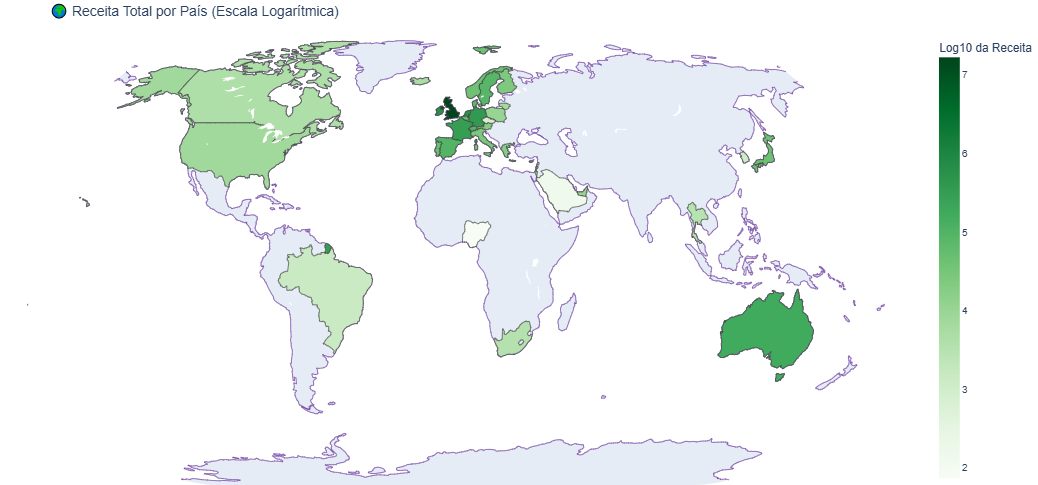

In [19]:
# Realizando um agrupamento de quantidade vendida por país
quantidade_por_pais = (
    df_sales.groupby('Country')['Quantity']
    .sum()
    .reset_index()
    .sort_values(by='Quantity', ascending=False)
)

In [20]:
# Exibindo o TOP 5 países com destaque 
print("📊 O TOP 5 Países com maior quantidade vendida são:\n")

top_5_paises_quantidade = quantidade_por_pais.head(5)

for _, row in top_5_paises_quantidade.iterrows():
    print(f"{row['Country']} — £{row['Quantity']}")

📊 O TOP 5 Países com maior quantidade vendida são:

United Kingdom — £9093654
Netherlands — £372529
Ireland — £333003
France — £268638
Denmark — £220004


In [21]:
# Criar uma nova coluna com o logaritmo da quantidade vendida
# Adiciona-se +1 para evitar erro em casos onde a quantidade seja zero
quantidade_por_pais['log_Quantity'] = np.log10(quantidade_por_pais['Quantity'] + 1)

# Criar um mapa coroplético (choropleth map) com Plotly Express
# A cor representa a quantidade total vendida (transformada em escala log)
fig = px.choropleth(
    quantidade_por_pais,
    locations='Country',                # coluna com o nome dos países
    locationmode='country names',       # usa nomes completos para localizar os países no mapa
    color='log_Quantity',               # cor baseada na quantidade (log)
    color_continuous_scale='Greens',    # escala de cor em tons de verde
    title='🌍 Quantidade Total por País (Escala Logarítmica)',
    hover_name='Country',               # mostra o nome do país ao passar o mouse
    hover_data={
        'Quantity': ':.2f',             # mostra a quantidade real com duas casas decimais
        'log_Quantity': False           # oculta o valor logarítmico no hover
    },
)

# Ajustar o título da barra de cores (colorbar)
fig.update_coloraxes(colorbar_title='Log10 de Quantidade Vendida')

# Personalizações do layout e mapa
fig.update_layout(
    geo=dict(
        showframe=False,               # remove a moldura ao redor do mapa
        showcoastlines=True,           # ativa linhas de costa
        coastlinecolor="RebeccaPurple",# define a cor das linhas de costa
        projection_type='natural earth', # usa projeção mais realista dos continentes
        bgcolor='rgba(0,0,0,0)',       # fundo transparente
    ),
    margin=dict(l=0, r=0, t=50, b=0),   # margens do gráfico
    font=dict(family="Arial", size=14),# fonte do gráfico
    width=1500,                         # largura do mapa
    height=700,                         # altura do mapa
)

# Exibir o gráfico
fig.show()

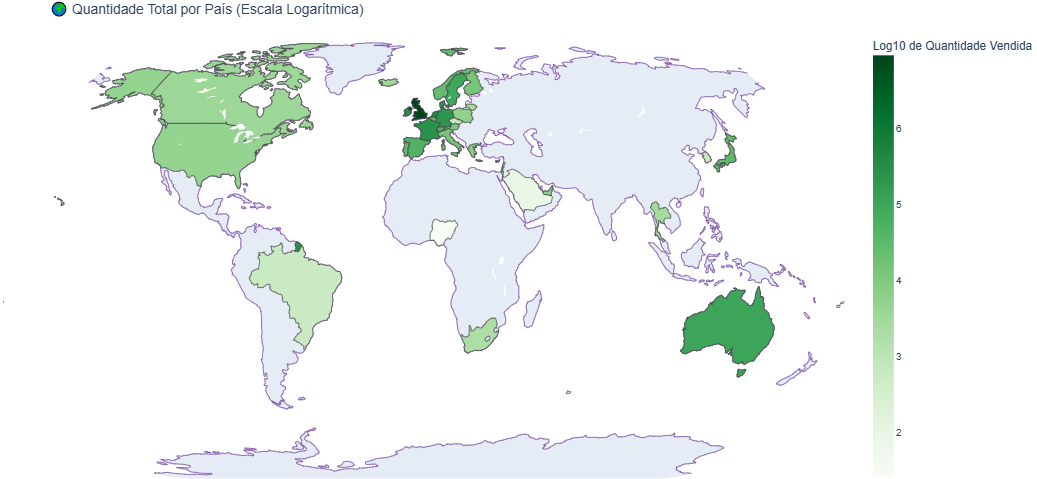

In [22]:
# Importa pycountry_convert para converter nomes de países em códigos ISO e continentes
import pycountry_convert as pc

def get_continent(country_name):
    # Mapeamento manual para nomes especiais ou diferentes da base padrão
    custom_map = {
        'European Union': 'Europe',
        'Caribbean': 'North America',
        'Guernsey': 'Europe',
        'Bermuda': 'North America',
        'Hong Kong': 'Asia',
        'South Korea': 'Asia',
        'USA': 'North America',
        'United States': 'North America'
    }

    if country_name in custom_map:
        return custom_map[country_name]

    try:
        country_code = pc.country_name_to_country_alpha2(country_name)
        continent_code = pc.country_alpha2_to_continent_code(country_code)
        continent_dict = {
            'AF': 'Africa',
            'NA': 'North America',
            'OC': 'Oceania',
            'AN': 'Antarctica',
            'AS': 'Asia',
            'EU': 'Europe',
            'SA': 'South America'
        }
        return continent_dict[continent_code]
    except:
        return 'Unknown'

# Aplica a função para criar a coluna 'Continent'
df_sales['Continent'] = df_sales['Country'].apply(get_continent)

In [23]:
# DataFrame com os resultados consolidados por Continente
df_continente = (
    df_sales.groupby('Continent')[['TotalPrice', 'Quantity']]
    .sum()
    .reset_index()
)

In [24]:
# Visualização do DataFrame de continente e receita gerada
df_continente

,Continent,TotalPrice,Quantity
0,Africa,3422.05,1982
1,Asia,124367.95,71938
2,Europe,19152605.98,10862291
3,North America,13808.11,11986
4,Oceania,165447.44,102932
5,South America,1394.02,542
6,Unknown,10878.66,6675


In [25]:
# Definir tamanho mínimo e máximo para os pontos no gráfico
min_size = 10
max_size = 70

# Normalizar a coluna 'TotalPrice' para variar entre 0 e 1
# Depois escala para o intervalo definido (min_size a max_size)
size_norm = (df_continente['TotalPrice'] - df_continente['TotalPrice'].min()) / (df_continente['TotalPrice'].max() - df_continente['TotalPrice'].min())
df_continente['size_norm'] = size_norm * (max_size - min_size) + min_size

# Criar gráfico de dispersão (scatter) usando Plotly Express
fig = px.scatter(
    df_continente,
    x='Quantity',          # eixo X: quantidade vendida
    y='TotalPrice',        # eixo Y: receita total
    size='size_norm',      # tamanho do ponto proporcional à receita (normalizada)
    color='Continent',     # cor dos pontos por continente
    hover_name='Continent',# nome exibido ao passar o mouse
    labels={
        'Quantity': 'Quantidade Vendida',
        'TotalPrice': 'Receita Total (£)',
        'Continent': 'Continente'
    },
    title='🌎 Relação entre Quantidade Vendida e Receita por Continente (em £)',
)

# Ajustar layout do gráfico
fig.update_layout(
    xaxis=dict(title='Quantidade Vendida', type='log'),  # escala logarítmica no eixo X
    yaxis=dict(title='Receita Total (£)', type='log'),   # escala logarítmica no eixo Y
    width=1200,
    height=700,
    legend_title_text='Continente',
)

# Exibir gráfico
fig.show()

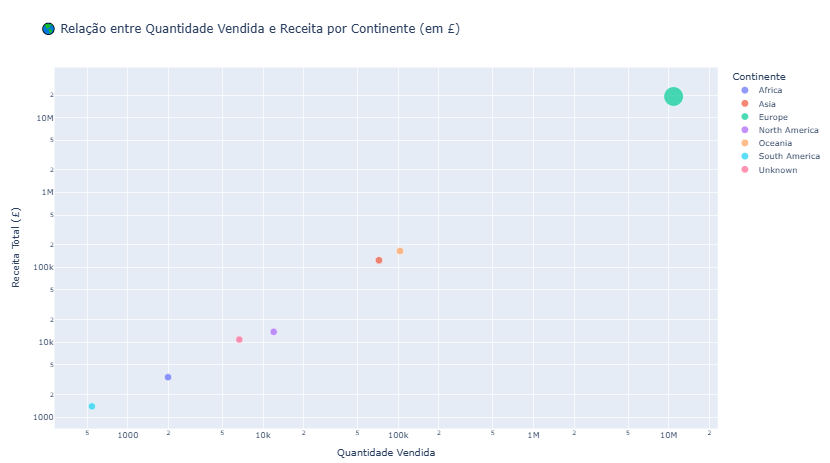

### 6.1 📌 Conclusão Final da Análise Geográfica de Vendas

A análise geográfica, representada por um gráfico de bolhas por continente, revelou uma forte concentração das vendas na **Europa**, tanto em quantidade de produtos quanto em receita gerada. No gráfico, cada bolha representa um continente, com o tamanho proporcional à receita total em libras (£), o eixo horizontal indicando a quantidade vendida e o eixo vertical, a receita total.

A **Europa** se destacou de forma esmagadora, sendo responsável por quase toda a receita da empresa, com mais de 10 milhões de produtos vendidos e aproximadamente £19 milhões em receita. Esse domínio reforça a necessidade de manter uma presença estratégica sólida na região, com foco em operações eficientes, marketing direcionado e fortalecimento de parcerias locais.

Outras regiões como **Oceania** e **Ásia** apresentaram participações modestas, mas com volumes suficientes para indicar algum nível de penetração nesses mercados. Esses continentes podem representar boas oportunidades de expansão, desde que acompanhadas de estratégias adaptadas às especificidades locais.

**América do Norte**, **África** e **América do Sul** mostraram volumes de vendas e receitas bastante reduzidos, o que pode indicar mercados ainda pouco explorados ou com desafios de entrada mais relevantes. Mesmo assim, são regiões que merecem atenção em futuras iniciativas comerciais.

Um ponto importante da análise foi a presença do grupo **"Unknown"**, que representou cerca de £10 mil em receita e mais de 6 mil unidades vendidas. Esses registros não puderam ser atribuídos a nenhum país ou região específica, o que destaca a importância de melhorar a padronização e a qualidade dos dados de origem para garantir uma visão mais precisa e confiável do desempenho global.

Em resumo, a análise por continente confirmou a forte dependência da Europa para os resultados da empresa, mas também revelou oportunidades de crescimento em outras regiões do mundo. Ao mesmo tempo, reforçou a importância de ações voltadas à melhoria contínua na governança dos dados.

## 7. Conclusão Final da Análise

Nesta análise, foi possível consolidar diversas informações a partir de uma base de dados de vendas de uma empresa. Logo no início, identificamos **padrões temporais relevantes**, que apontam para uma **sazonalidade no final do ano**. A partir de setembro, tanto a **quantidade vendida** quanto a **receita** da empresa tendem a crescer, evidenciando um aumento significativo na demanda.

Além disso, observamos que o **ano de 2011 teve desempenho inferior ao de 2010**, possivelmente devido a uma **parada ou desaceleração nas operações**. Diante desse cenário, a empresa pode adotar estratégias específicas para **alavancar o desempenho nos meses de alta**, como antecipação de estoque e campanhas promocionais focadas em datas sazonais. Por outro lado, o **primeiro semestre apresenta performance mais fraca**, o que, embora comum em negócios sazonais, representa uma **oportunidade para ações de marketing e diversificação de portfólio**.

Em relação aos produtos, foi possível destacar itens que aparecem entre os **cinco mais vendidos em volume**, mas não figuram entre os que geram maior receita. Isso sugere que a empresa **vende muitos itens de baixo valor unitário**, o que impacta negativamente o **ticket médio**. Por outro lado, alguns **produtos pontuais**, que foram comercializados apenas uma vez no período analisado, demonstraram **ótimo desempenho em receita**. A empresa poderia investigar esses casos para **explorar seu potencial de forma recorrente**, aproveitando a boa aceitação do mercado.

Também foi possível notar que **itens decorativos, presentes e produtos festivos** aparecem com frequência entre os destaques de vendas, o que reforça a **importância da sazonalidade e do calendário promocional** no planejamento comercial da empresa.

Por fim, a análise geográfica reforça a **centralidade do Reino Unido**, responsável pela maior parte da receita e da quantidade vendida ao longo do período. Contudo, também observamos destaque em **outros continentes** além do europeu, especialmente **Oceania e Ásia**, que apresentaram **resultados similares e consistentes**. Esses mercados representam **oportunidades estratégicas** e podem ser explorados com **ações direcionadas**, como campanhas localizadas e oferta de produtos que já demonstraram bom desempenho nesses países.
